In [23]:
import seaborn as sns
import json
import pandas as pd
import numpy as np


def load_data(file: str):
    maps = {}
    with open(file) as f:
        for line in f:
            if line.startswith("{"):
                x = json.loads(line)
                if x.get("type") == "map" and x.get("data", {}) is not None:
                    for k, v in x.get("data").items():
                        maps[k] = v
    entries = [(k, v) for k, v in maps["@"].items()]
    entries.sort(key=lambda x: x[1])
    total_samples = sum(x[1] for x in entries)
    print("Total samples:", total_samples)
    entries_w_index = [(float(i + 1) / len(entries), x[0], x[1]) for i, x in enumerate(entries)]
    entries_cumulative = []
    s = 0
    for i, x in enumerate(entries_w_index):
        s += x[2]
        entries_cumulative.append((x[0], x[1], x[2], s))  # (index, ipaddr, samples, samples.cumulative)
    entries_cumulative_normed = [(x[0], x[1], x[2], x[3], x[2] / total_samples, x[3] / total_samples) for x in entries_cumulative]
    df = pd.DataFrame(entries_cumulative_normed, columns=["ip", "ip.addr", "samples", "samples.cumulative", "samples.norm", "samples.cumulative.norm"])
    # print(df)
    return df


def plot_one(file: str):
    df = load_data(file)

    g = sns.lineplot(data=df, x="ip", y="samples.cumulative.norm")

    if g.axes:
        g.axes.grid(True, axis="both")

    g.set_xticks(np.arange(0, 1.1, 0.1))
    g.set_yticks(np.arange(0, 1.1, 0.1))

    return df

Total samples: 474022


,ip,ip.addr,samples,samples.cumulative,samples.norm,samples.cumulative.norm
0,0.000244,0x75299ae4e607,1,1,0.000002,0.000002
1,0.000488,0xffffffff9540728b,1,2,0.000002,0.000004
2,0.000732,0xffffffff954230c4,1,3,0.000002,0.000006
3,0.000977,0xffffffff95404e9f,1,4,0.000002,0.000008
4,0.001221,0x75299ad7624a,1,5,0.000002,0.000011
...,...,...,...,...,...,...
4091,0.999023,0x75299ad60c6a,17118,348516,0.036112,0.735232
4092,0.999268,0x75299ad590ee,17741,366257,0.037427,0.772658
4093,0.999512,0x75299aef22db,17957,384214,0.037882,0.810540
4094,0.999756,0xffffffff962462df,36121,420335,0.076201,0.886742


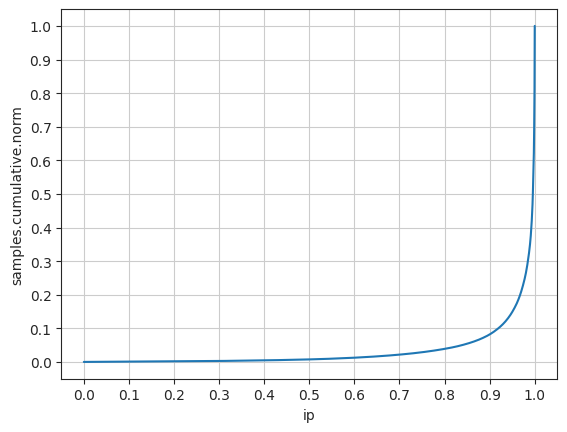

In [24]:
plot_one("../../lusearch-ix.jsonl")